## BREAKING IMAGE CAPTCHA CNN MODEL WITH CIFAR-10 Dataset

In [1]:
### Import various libraries ###
import tensorflow as tf 
import numpy as np
import graphviz
from keras.callbacks import ModelCheckpoint
import pydot
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Import CIFAR-10 Data ###
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [3]:
### Shape of the Training data ###
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
### Shape of the Test data ###
print(Y_train.shape)
print(Y_test.shape)

(50000, 1)
(10000, 1)


In [5]:
### Dimensionality of Y_train ###
Y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [6]:
### Convert Y_train from a 2 dimensional to 1 dimensional array ###
Y_train = Y_train.reshape(-1,)
Y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

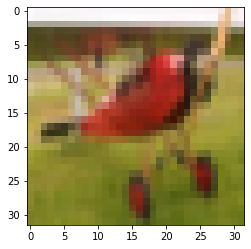

In [7]:
### Plot sample image ###
plt.imshow(X_train[35])

In [8]:
### Assign the classes with their actual names and not numbered labels ###
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

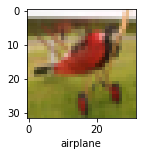

In [9]:
### Plot sample image again with the proper class label ###
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    
plot_sample(X_train,Y_train,35)

In [10]:
### Normalize data by dividing both X train test by 255 ###
X_train = X_train / 255.0
X_test = X_test / 255.0

### Model 1 - Base Model

In [11]:
### Build a convolutional neural network to compare its performance ###
cnetwork = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

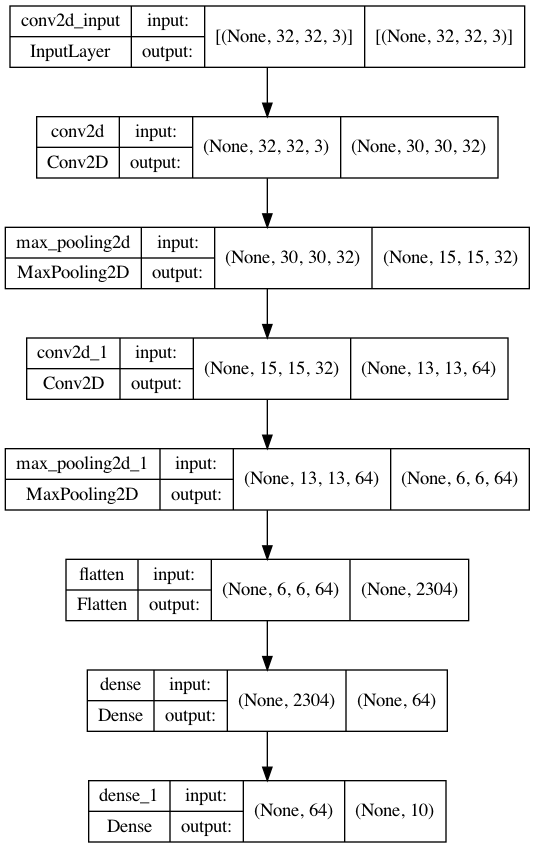

In [12]:
### Print network for viewing ###
plot_model(cnetwork, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
### Compile and Fit the model ###
cnetwork.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fitting the model with batch size of 128 and 15 training epochs ###
history = cnetwork.fit(X_train, 
                    Y_train, 
                    epochs=15,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/15
391/391 [==============================] - 20s 50ms/step - loss: 1.6226 - accuracy: 0.4131 - val_loss: 1.3451 - val_accuracy: 0.5186
Epoch 2/15
391/391 [==============================] - 20s 50ms/step - loss: 1.2762 - accuracy: 0.5508 - val_loss: 1.2906 - val_accuracy: 0.5428
Epoch 3/15
391/391 [==============================] - 20s 51ms/step - loss: 1.1418 - accuracy: 0.6009 - val_loss: 1.1078 - val_accuracy: 0.6178
Epoch 4/15
391/391 [==============================] - 26s 67ms/step - loss: 1.0558 - accuracy: 0.6316 - val_loss: 1.0275 - val_accuracy: 0.6436
Epoch 5/15
391/391 [==============================] - 26s 67ms/step - loss: 0.9844 - accuracy: 0.6580 - val_loss: 1.0102 - val_accuracy: 0.6476
Epoch 6/15
391/391 [==============================] - 28s 73ms/step - loss: 0.9363 - accuracy: 0.6766 - val_loss: 0.9865 - val_accuracy: 0.6585
Epoch 7/15
391/391 [==============================] - 29s 73ms/step - loss: 0.8891 - accuracy: 0.6934 - val_loss: 0.9375 - val_accuracy:

In [46]:
cnetwork.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.8776 - accuracy: 0.7022


[0.8776116371154785, 0.7021999955177307]

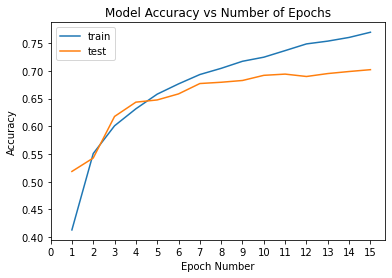

In [15]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(1,1+len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,16,1))
plt.show()

In [16]:
### Training performance ###
## Find highest score for the test data ##
highest_score = max(history.history['val_accuracy'])

## Find the training epoch that has the highest test accuracy score 
epoch_num = np.array(history.history['val_accuracy']).argmax()+1

## Print the performance accuracy and training epoch
print((highest_score, epoch_num))

(0.7021999955177307, 15)


In [17]:
### Classification Report to compare the accuracy for all the classes ###
from sklearn.metrics import confusion_matrix , classification_report
y_pred = cnetwork.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.80      0.73      1000
           1       0.80      0.81      0.81      1000
           2       0.57      0.64      0.60      1000
           3       0.52      0.54      0.53      1000
           4       0.72      0.62      0.66      1000
           5       0.69      0.51      0.59      1000
           6       0.73      0.83      0.78      1000
           7       0.74      0.75      0.75      1000
           8       0.80      0.79      0.79      1000
           9       0.83      0.73      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



### Model 2 - Adjusting the learning rate

In [18]:
### Setting the new learning rate ###
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

### Configuring new optimizer ###
optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

In [19]:
### Build a convolutional neural network to compare its performance ###
cnetwork2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

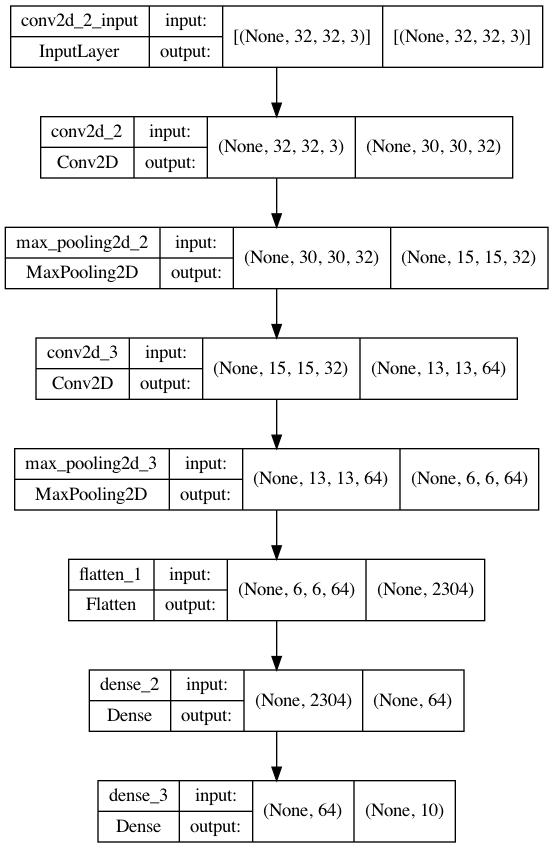

In [20]:
### Print network for viewing ###
plot_model(cnetwork2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [21]:
### Compile and Fit the model ###
cnetwork2.compile(optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fitting the model with batch size of 128 and 15 training epochs ###
history2 = cnetwork2.fit(X_train, 
                    Y_train, 
                    epochs=15,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/15
391/391 [==============================] - 27s 67ms/step - loss: 1.7067 - accuracy: 0.3960 - val_loss: 1.3734 - val_accuracy: 0.5207
Epoch 2/15
391/391 [==============================] - 25s 64ms/step - loss: 1.3430 - accuracy: 0.5308 - val_loss: 1.2540 - val_accuracy: 0.5712
Epoch 3/15
391/391 [==============================] - 27s 68ms/step - loss: 1.1701 - accuracy: 0.5917 - val_loss: 1.1921 - val_accuracy: 0.5723
Epoch 4/15
391/391 [==============================] - 26s 67ms/step - loss: 1.0620 - accuracy: 0.6343 - val_loss: 1.1433 - val_accuracy: 0.6097
Epoch 5/15
391/391 [==============================] - 27s 68ms/step - loss: 0.9834 - accuracy: 0.6615 - val_loss: 1.0398 - val_accuracy: 0.6408
Epoch 6/15
391/391 [==============================] - 28s 72ms/step - loss: 0.9219 - accuracy: 0.6852 - val_loss: 0.9745 - val_accuracy: 0.6664
Epoch 7/15
391/391 [==============================] - 26s 66ms/step - loss: 0.8687 - accuracy: 0.7014 - val_loss: 0.9502 - val_accuracy:

In [22]:
cnetwork2.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.0043 - accuracy: 0.6846


[1.0043060779571533, 0.6845999956130981]

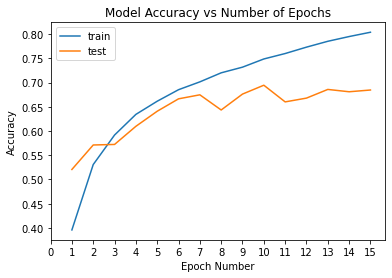

In [23]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history2.history['accuracy'])), history2.history['accuracy'])
plt.plot(range(1,1+len(history2.history['val_accuracy'])), history2.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,16,1))
plt.show()

In [24]:
### Training performance ###
## Find highest score for the test data ##
highest_score2 = max(history2.history['val_accuracy'])

## Find the training epoch that has the highest test accuracy score 
epoch_num2 = np.array(history2.history['val_accuracy']).argmax()+1

## Print the performance accuracy and training epoch
print((highest_score2, epoch_num2))

(0.6945000290870667, 10)


In [25]:
### Classification Report to compare the accuracy for all the classes ###
from sklearn.metrics import confusion_matrix , classification_report
y_pred2 = cnetwork2.predict(X_test)
y_pred_classes2 = [np.argmax(element) for element in y_pred2]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes2))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.78      0.84      0.81      1000
           2       0.59      0.57      0.58      1000
           3       0.49      0.58      0.53      1000
           4       0.57      0.72      0.64      1000
           5       0.62      0.55      0.58      1000
           6       0.76      0.77      0.76      1000
           7       0.71      0.75      0.73      1000
           8       0.90      0.65      0.75      1000
           9       0.87      0.68      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.69     10000
weighted avg       0.70      0.68      0.69     10000



### Model 3 - Learning rate and Dropout

In [26]:
### Setting the new learning rate ###
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

### Configuring new optimizer ###
optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

In [27]:
### Build a convolutional neural network to compare its performance ###
cnetwork3 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [28]:
### Compile and Fit the model ###
cnetwork3.compile(optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fitting the model with batch size of 128 and 20 training epochs ###
history3 = cnetwork3.fit(X_train, 
                    Y_train, 
                    epochs=20,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/20
391/391 [==============================] - 29s 72ms/step - loss: 1.7295 - accuracy: 0.3766 - val_loss: 1.3816 - val_accuracy: 0.5063
Epoch 2/20
391/391 [==============================] - 28s 71ms/step - loss: 1.3972 - accuracy: 0.5054 - val_loss: 1.2112 - val_accuracy: 0.5712
Epoch 3/20
391/391 [==============================] - 27s 70ms/step - loss: 1.2332 - accuracy: 0.5654 - val_loss: 1.2822 - val_accuracy: 0.5646
Epoch 4/20
391/391 [==============================] - 28s 71ms/step - loss: 1.1280 - accuracy: 0.6047 - val_loss: 1.1889 - val_accuracy: 0.5918
Epoch 5/20
391/391 [==============================] - 28s 71ms/step - loss: 1.0562 - accuracy: 0.6314 - val_loss: 1.0517 - val_accuracy: 0.6381
Epoch 6/20
391/391 [==============================] - 29s 74ms/step - loss: 0.9946 - accuracy: 0.6545 - val_loss: 0.9844 - val_accuracy: 0.6597
Epoch 7/20
391/391 [==============================] - 28s 72ms/step - loss: 0.9439 - accuracy: 0.6703 - val_loss: 1.0009 - val_accuracy:

In [29]:
cnetwork3.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9211 - accuracy: 0.7022


[0.9210709929466248, 0.7021999955177307]

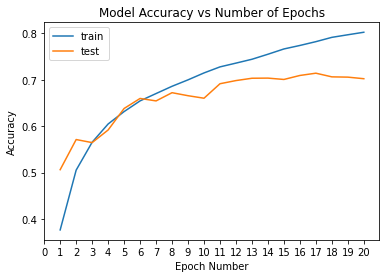

In [49]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history3.history['accuracy'])), history3.history['accuracy'])
plt.plot(range(1,1+len(history3.history['val_accuracy'])), history3.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,21,1))
plt.show()

In [31]:
### Training performance ###
## Find highest score for the test data ##
highest_score3 = max(history3.history['val_accuracy'])

## Find the training epoch that has the highest test accuracy score 
epoch_num3 = np.array(history3.history['val_accuracy']).argmax()+1

## Print the performance accuracy and training epoch
print((highest_score3, epoch_num3))

(0.7141000032424927, 17)


In [32]:
### Classification Report to compare the accuracy for all the classes ###
from sklearn.metrics import confusion_matrix , classification_report
y_pred3 = cnetwork3.predict(X_test)
y_pred_classes3 = [np.argmax(element) for element in y_pred3]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes3))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.75      0.75      1000
           1       0.82      0.84      0.83      1000
           2       0.72      0.51      0.60      1000
           3       0.62      0.42      0.50      1000
           4       0.59      0.67      0.63      1000
           5       0.67      0.53      0.59      1000
           6       0.70      0.83      0.76      1000
           7       0.61      0.85      0.71      1000
           8       0.82      0.80      0.81      1000
           9       0.73      0.82      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



### Model 4 - Batch Normalization and increased Epochs

In [33]:
### Build a convolutional neural network to compare its performance ###
cnetwork4 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

In [34]:
### Compile and Fit the model ###
cnetwork4.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fitting the model with batch size of 128 and 20 training epochs ###
history4 = cnetwork4.fit(X_train, 
                    Y_train, 
                    epochs=20,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/20
391/391 [==============================] - 22s 54ms/step - loss: 1.3454 - accuracy: 0.5270 - val_loss: 1.2875 - val_accuracy: 0.5473
Epoch 2/20
391/391 [==============================] - 21s 54ms/step - loss: 1.0037 - accuracy: 0.6522 - val_loss: 1.1094 - val_accuracy: 0.6197
Epoch 3/20
391/391 [==============================] - 22s 57ms/step - loss: 0.8943 - accuracy: 0.6910 - val_loss: 1.1478 - val_accuracy: 0.6091
Epoch 4/20
391/391 [==============================] - 23s 60ms/step - loss: 0.8186 - accuracy: 0.7179 - val_loss: 1.0101 - val_accuracy: 0.6597
Epoch 5/20
391/391 [==============================] - 23s 60ms/step - loss: 0.7559 - accuracy: 0.7381 - val_loss: 1.0200 - val_accuracy: 0.6605
Epoch 6/20
391/391 [==============================] - 23s 60ms/step - loss: 0.7117 - accuracy: 0.7503 - val_loss: 0.9189 - val_accuracy: 0.6876
Epoch 7/20
391/391 [==============================] - 23s 60ms/step - loss: 0.6650 - accuracy: 0.7681 - val_loss: 0.9617 - val_accuracy:

In [35]:
cnetwork4.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 1.1365 - accuracy: 0.6881


[1.1365333795547485, 0.6880999803543091]

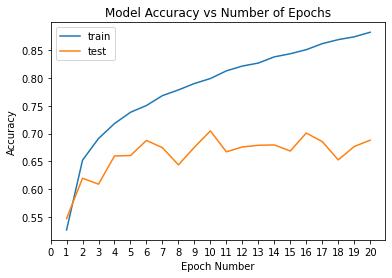

In [48]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history4.history['accuracy'])), history4.history['accuracy'])
plt.plot(range(1,1+len(history4.history['val_accuracy'])), history4.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,21,1))
plt.show()

In [37]:
### Training performance ###
## Find highest score for the test data ##
highest_score4 = max(history4.history['val_accuracy'])

## Find the training epoch that has the highest test accuracy score 
epoch_num4 = np.array(history4.history['val_accuracy']).argmax()+1

## Print the performance accuracy and training epoch
print((highest_score4, epoch_num4))

(0.7046999931335449, 10)


In [38]:
### Classification Report to compare the accuracy for all the classes ###
from sklearn.metrics import confusion_matrix , classification_report
y_pred4 = cnetwork4.predict(X_test)
y_pred_classes4 = [np.argmax(element) for element in y_pred4]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes4))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.85      0.78      0.81      1000
           2       0.63      0.54      0.58      1000
           3       0.45      0.61      0.52      1000
           4       0.71      0.57      0.64      1000
           5       0.55      0.66      0.60      1000
           6       0.78      0.71      0.74      1000
           7       0.72      0.77      0.74      1000
           8       0.81      0.78      0.80      1000
           9       0.81      0.73      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



### Model 5 - Dropout only

In [39]:
### Build a convolutional neural network to compare its performance ###
cnetwork5 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [40]:
### Compile and Fit the model ###
cnetwork5.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fitting the model with batch size of 128 and 20 training epochs ###
history5 = cnetwork5.fit(X_train, 
                    Y_train, 
                    epochs=20,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/20
391/391 [==============================] - 27s 67ms/step - loss: 1.6969 - accuracy: 0.3840 - val_loss: 1.3570 - val_accuracy: 0.5160
Epoch 2/20
391/391 [==============================] - 27s 70ms/step - loss: 1.3718 - accuracy: 0.5056 - val_loss: 1.2475 - val_accuracy: 0.5612
Epoch 3/20
391/391 [==============================] - 28s 71ms/step - loss: 1.2394 - accuracy: 0.5550 - val_loss: 1.1737 - val_accuracy: 0.5831
Epoch 4/20
391/391 [==============================] - 28s 71ms/step - loss: 1.1575 - accuracy: 0.5893 - val_loss: 1.0657 - val_accuracy: 0.6303
Epoch 5/20
391/391 [==============================] - 26s 66ms/step - loss: 1.0861 - accuracy: 0.6160 - val_loss: 1.0296 - val_accuracy: 0.6430
Epoch 6/20
391/391 [==============================] - 26s 66ms/step - loss: 1.0352 - accuracy: 0.6353 - val_loss: 0.9869 - val_accuracy: 0.6545
Epoch 7/20
391/391 [==============================] - 27s 70ms/step - loss: 0.9903 - accuracy: 0.6498 - val_loss: 0.9360 - val_accuracy:

In [41]:
cnetwork5.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.8748 - accuracy: 0.7045


[0.8747954368591309, 0.7045000195503235]

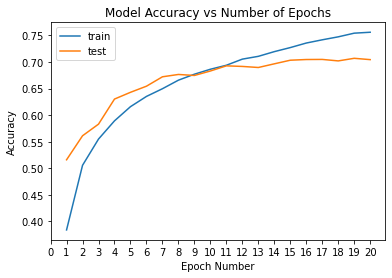

In [47]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history5.history['accuracy'])), history5.history['accuracy'])
plt.plot(range(1,1+len(history5.history['val_accuracy'])), history5.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,21,1))
plt.show()

In [43]:
### Training performance ###
## Find highest score for the test data ##
highest_score5 = max(history5.history['val_accuracy'])

## Find the training epoch that has the highest test accuracy score 
epoch_num5 = np.array(history5.history['val_accuracy']).argmax()+1

## Print the performance accuracy and training epoch
print((highest_score5, epoch_num5))

(0.7070000171661377, 19)


In [44]:
### Classification Report to compare the accuracy for all the classes ###
from sklearn.metrics import confusion_matrix , classification_report
y_pred5 = cnetwork5.predict(X_test)
y_pred_classes5 = [np.argmax(element) for element in y_pred5]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes5))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.73      0.75      1000
           1       0.81      0.81      0.81      1000
           2       0.63      0.56      0.60      1000
           3       0.51      0.56      0.53      1000
           4       0.69      0.59      0.63      1000
           5       0.62      0.60      0.61      1000
           6       0.79      0.79      0.79      1000
           7       0.67      0.80      0.73      1000
           8       0.82      0.80      0.81      1000
           9       0.76      0.80      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

